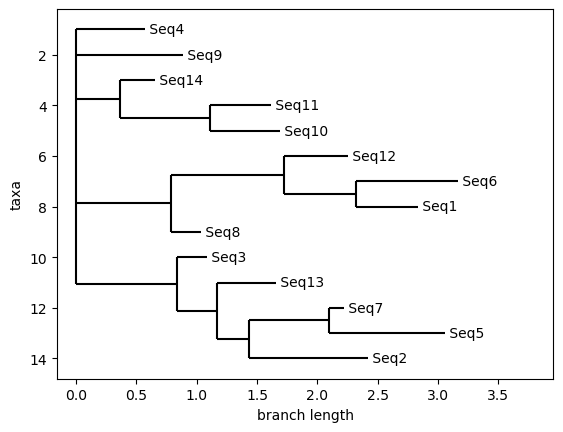

Árvore filogenética salva com sucesso em 'arvore_filogenetica.nwk'.
O número de sequências na árvore é: 14
A profundidade máxima da árvore é: 5
--------------------------------------------------------------------
Clade: No Name - Accession: Seq4, Seq9, Seq14, Seq11, Seq10, Seq12, Seq6, Seq1, Seq8, Seq3, Seq13, Seq7, Seq5, Seq2
Clade: Seq4 - Accession: Seq4
Clade: Seq9 - Accession: Seq9
Clade: No Name - Accession: Seq14, Seq11, Seq10
Clade: Seq14 - Accession: Seq14
Clade: No Name - Accession: Seq11, Seq10
Clade: No Name - Accession: Seq12, Seq6, Seq1, Seq8
Clade: No Name - Accession: Seq12, Seq6, Seq1
Clade: Seq8 - Accession: Seq8
Clade: No Name - Accession: Seq3, Seq13, Seq7, Seq5, Seq2
Clade: Seq3 - Accession: Seq3
Clade: No Name - Accession: Seq13, Seq7, Seq5, Seq2
--------------------------------------------------------------------
[[' Seq13', ' Seq7', ' Seq5', ' Seq2'], [' Seq3'], [' Seq8'], [' Seq12', ' Seq6', ' Seq1'], [' Seq11', ' Seq10'], [' Seq14'], [' Seq9'], [' Seq4']]


In [7]:
from Bio import Phylo
import matplotlib.pyplot as plt
from Bio.Phylo.BaseTree import Clade, Tree
import random
import numpy as np

# Crie um objeto de árvore vazia
arvore_filogenetica = Tree()

# Crie 14 sequências genéricas (você pode substituir por IDs reais)
sequencias = ["Seq1", "Seq2", "Seq3", "Seq4", "Seq5", "Seq6", "Seq7", "Seq8",
              "Seq9", "Seq10", "Seq11", "Seq12", "Seq13", "Seq14"]

# # Crie um clado raiz e adicione as sequências como clados às folhas do clado raiz
# clado_raiz = Clade(clades=[Clade(name=seq) for seq in sequencias])
# Adicione as sequências como clados às folhas do clado raiz com comprimentos de ramos e nós aleatórios
# for sequencia in sequencias:
#     clado = Clade(name=sequencia, branch_length=random.uniform(0.1, 1.0))  # Comprimento do ramo aleatório entre 0.1 e 1.0
#     clado_raiz.clades.append(clado)

# Crie um clado raiz
clado_raiz = Clade()

# Adicione as sequências como clados às folhas do clado raiz com comprimentos de ramos aleatórios
for sequencia in sequencias:
    clado = Clade(name=sequencia, branch_length=random.uniform(0.1, 1.0))  # Comprimento do ramo aleatório entre 0.1 e 1.0
    clado_raiz.clades.append(clado)

# Realize bifurcações aleatórias
for i in range(9):  # 7 bifurcações aleatórias
    bifurcacao = Clade()
    bifurcacao.branch_length = random.uniform(0.1, 1.0)  # Comprimento do ramo aleatório entre 0.1 e 1.0
    bifurcacao.clades.append(clado_raiz.clades.pop(random.randint(0, len(clado_raiz.clades) - 1)))
    bifurcacao.clades.append(clado_raiz.clades.pop(random.randint(0, len(clado_raiz.clades) - 1)))
    clado_raiz.clades.append(bifurcacao)
    
# Defina o clado raiz como raiz da árvore filogenética
arvore_filogenetica.root = clado_raiz

# Salve a árvore em formato Newick
# Phylo.draw(arvore_filogenetica, do_show=True, orientation='right')
Phylo.draw(arvore_filogenetica, do_show=True) #, branch_lengths=False)

# Exiba o gráfico
# plt.show()

Phylo.write(arvore_filogenetica, "arvore_filogenetica.nwk", "newick")

print("Árvore filogenética salva com sucesso em 'arvore_filogenetica.nwk'.")

# Carregue a árvore a partir do arquivo
arvore = Phylo.read("arvore_filogenetica.nwk", "newick")

# Inicialize uma variável para contar o número de sequências
numero_de_sequencias = 0

# Percorra os clados da árvore
for clado in arvore.find_clades():
    # Verifique se o clado é um clado terminal (folha)
    if clado.is_terminal():
        numero_de_sequencias += 1

# Imprima o número de sequências
print(f"O número de sequências na árvore é: {numero_de_sequencias}")

# Dicionário para armazenar clados com base nos nós de bifurcação
clados_por_no = {}

# Percorra os clados da árvore
for clado in arvore.find_clades():
    # Verifique se o clado é um nó de bifurcação (não é uma folha)
    if not clado.is_terminal():
        # Use o nó de bifurcação como chave no dicionário e adicione os clados filhos a esse nó
        clados_por_no[clado] = clado.clades

# # Agora você tem um dicionário onde as chaves são os nós de bifurcação e os valores são os clados filhos
# # Você pode acessar os clados para cada nó de bifurcação e listar as sequências pertencentes a cada clado
# ctrno=0
# for no, clados_filhos in clados_por_no.items():
#     print(f"Nó de bifurcação: {no.name if no.name else str(ctrno)}")
# #     print(f"Nó de bifurcação: {no.name if no.name else 'Sem nome'}")
#     ctrclado=0
#     for clado_filho in clados_filhos:
#         sequencias = [folha.name for folha in clado_filho.get_terminals()]
#         print(f"Clado filho: {clado_filho.name if clado_filho.name else str(ctrclado)} - Accession: {', '.join(sequencias)}")
# #         print(f"Clado filho: {clado_filho.name if clado_filho.name else 'Sem nome'} - Accession: {', '.join(sequencias)}")
#         ctrclado+=1
#     ctrno+=1
   
# Função recursiva para calcular a profundidade de cada nó
def calcular_profundidade(clado, profundidade_atual):
    clado.profundidade = profundidade_atual
    for clado_filho in clado.clades:
        calcular_profundidade(clado_filho, profundidade_atual + 1)

# Inicialize a raiz com profundidade 0
calcular_profundidade(arvore.root, 0)

# Dicionário para armazenar a profundidade de cada nó
profundidade_por_no = {}

# Percorra os clados da árvore e armazene a profundidade de cada nó
for clado in arvore.find_clades():
    profundidade_por_no[clado] = clado.profundidade

# Determine a profundidade máxima na árvore
profundidade_maxima = max(profundidade_por_no.values())

print(f"A profundidade máxima da árvore é: {profundidade_maxima}")

print("--------------------------------------------------------------------")
# Função para encontrar clados com profundidade maior que um limite
def encontrar_clados_profundidade(clado, limite):
    clados_encontrados = []
    if clado.profundidade < limite:
        clados_encontrados.append(clado)
    for clado_filho in clado.clades:
        clados_encontrados.extend(encontrar_clados_profundidade(clado_filho, limite))
    return clados_encontrados

# Determine a profundidade máxima na árvore
profundidade_maxima = max(clado.profundidade for clado in arvore.find_clades())

# Defina o limite de profundidade desejado (por exemplo, profundidade > profundidade máxima - 2)
levels_2_root = 2 # 1
limite_profundidade = profundidade_maxima - levels_2_root 

# Encontre os clados com profundidade maior que o limite
clados_desejados = encontrar_clados_profundidade(arvore.root, limite_profundidade)

# Imprima os clados encontrados
CLADES=[]
for clado in clados_desejados:
    sequencias = [folha.name for folha in clado.get_terminals()]
    str2prn = f"Clade: {clado.name if clado.name else 'No Name'} - Accession: {', '.join(sequencias)}"
    print(str2prn)
    CLADES.append(str2prn)

# print(lista_de_clados)

# Phylo.draw(arvore, do_show=True)
print("--------------------------------------------------------------------")
# interpretando o agrupamento pos-leitura
CLUSTERS=[]
assigned=[]
for i in range(len(CLADES)-1,0,-1):
#     print(CLADES[i])
    Accession = []
    if "No Name" in CLADES[i]:
        # see if it contains any of the ´previously assigned to clusters
        strains = CLADES[i].split(":")[-1].split(",")
#         print(strains)
        found=0
#         print("strain ",strain," CLUSTERS ",CLUSTERS)
        for strain in strains:
            if strain in assigned:
                found=1
                break
        if found==0:
            for strain in strains:
                Accession.append(strain)
                assigned.append(strain)
#                 print(Accession[-1])
    else:
        strain = CLADES[i].split(":")[-1]
        Accession.append(strain)
        assigned.append(strain)
#         print(Accession[-1])
    if len(Accession)>0:
        CLUSTERS.append(Accession)
        
print(CLUSTERS) # OK ----- 10.10.2023
